## Machine Learning Model 2

## All imports

In [7]:
import warnings
from sklearn.exceptions import DataConversionWarning
from sklearn.utils import DataConversionWarning as skDataConversionWarning
from warnings import simplefilter
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import numpy as np
import pickle 


sin variables obvias

In [8]:
import pandas as pd

# load the csv data sets

# Con Index = False, no guardamos el indice en el archivo resultante
X_train = pd.read_csv("../data/processed/more_drop_variable/X_train_2.csv")
X_test = pd.read_csv("../data/processed/more_drop_variable/X_test_2.csv")

y_train = pd.read_csv("../data/processed/more_drop_variable/y_train_2.csv")
y_test = pd.read_csv("../data/processed/more_drop_variable/y_test_2.csv")

In [9]:
X_train

,SEXOa,EDADa,ESTUDIOS,G21,G22,G23,G24a,G25a_1,G25a_5,G25a_6,...,R108_2,R108_4,T113,P87_2a_nuevo,P87_4a_nuevo,P87_5a_nuevo,P87_12a_nuevo,P87_13a_nuevo,P87_18a_nuevo,P85_nuevo
0,2.0,15.0,5.0,1.0,2.0,3.0,1.0,0.0,0.0,0.0,...,0.0,0.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,40.0,9.0,1.0,1.0,3.0,1.0,0.0,0.0,0.0,...,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2.0,45.0,4.0,2.0,1.0,3.0,2.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,34.0,7.0,1.0,2.0,3.0,2.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,83.0,4.0,3.0,1.0,3.0,2.0,1.0,1.0,1.0,...,0.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17652,2.0,55.0,4.0,2.0,2.0,3.0,3.0,0.0,1.0,1.0,...,0.0,0.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
17653,2.0,38.0,5.0,2.0,2.0,3.0,2.0,0.0,0.0,0.0,...,0.0,0.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
17654,1.0,37.0,6.0,1.0,2.0,3.0,1.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17655,2.0,56.0,9.0,2.0,1.0,2.0,2.0,1.0,0.0,0.0,...,0.0,0.0,7.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [10]:
X_test

,SEXOa,EDADa,ESTUDIOS,G21,G22,G23,G24a,G25a_1,G25a_5,G25a_6,...,R108_2,R108_4,T113,P87_2a_nuevo,P87_4a_nuevo,P87_5a_nuevo,P87_12a_nuevo,P87_13a_nuevo,P87_18a_nuevo,P85_nuevo
0,2.0,24.0,9.0,1.0,2.0,3.0,2.0,0.0,0.0,0.0,...,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,65.0,9.0,2.0,1.0,3.0,3.0,0.0,1.0,0.0,...,0.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,60.0,8.0,1.0,2.0,3.0,1.0,0.0,0.0,0.0,...,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,83.0,6.0,2.0,2.0,2.0,3.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
4,1.0,92.0,4.0,4.0,1.0,1.0,4.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4410,2.0,41.0,7.0,4.0,1.0,2.0,3.0,0.0,0.0,1.0,...,0.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4411,2.0,85.0,3.0,2.0,1.0,3.0,2.0,1.0,0.0,1.0,...,0.0,0.0,7.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
4412,2.0,53.0,9.0,1.0,2.0,3.0,1.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4413,2.0,78.0,4.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [11]:
y_train

,dep_anx
0,0
1,0
2,0
3,0
4,0
...,...
17652,0
17653,0
17654,0
17655,0


In [12]:
y_test

,dep_anx
0,0
1,1
2,0
3,0
4,0
...,...
4410,1
4411,0
4412,0
4413,0


#### Carga del primer modelo

In [13]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from pickle import dump

In [14]:

## XGBoost Classifier
# Create an XGBoost classifier with a specified random state
model_x = XGBClassifier(random_state=42)

# Train the model on the training set
model_x.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [15]:

# Make predictions on the training set and calculate the accuracy
y_pred_train = model_x.predict(X_train)
train_score = accuracy_score(y_train, y_pred_train)
print(f'The accuracy score for Train is {train_score}.')

# Make predictions on the testing set and calculate the accuracy
y_pred_test = model_x.predict(X_test)
test_score = accuracy_score(y_test, y_pred_test)
print(f'The accuracy score for Test is {test_score}.')

The accuracy score for Train is 0.9554850767401031.
The accuracy score for Test is 0.8856172140430351.


In [16]:

# Calculate and print the difference in accuracy between the training and testing sets
difference = train_score - test_score
print(f'The accuracy difference between the models is {difference}.')

# Save the trained model to a file
dump(model_x, open("../models/x_boosting_default_model_2.pk", "wb"))



The accuracy difference between the models is 0.06986786269706802.


### Parametros

que es ____ y como mejora mi xgboost. Añade los posibles parametros en una lista que puedo poner para un gridsearch

In [17]:
# Obtener y mostrar todos los parámetros del modelo
params = model_x.get_params()

# Imprimir los parámetros
for key, value in params.items():
    print(f"{key}")

objective
base_score
booster
callbacks
colsample_bylevel
colsample_bynode
colsample_bytree
device
early_stopping_rounds
enable_categorical
eval_metric
feature_types
gamma
grow_policy
importance_type
interaction_constraints
learning_rate
max_bin
max_cat_threshold
max_cat_to_onehot
max_delta_step
max_depth
max_leaves
min_child_weight
missing
monotone_constraints
multi_strategy
n_estimators
n_jobs
num_parallel_tree
random_state
reg_alpha
reg_lambda
sampling_method
scale_pos_weight
subsample
tree_method
validate_parameters
verbosity


### Visualizamos el modelo

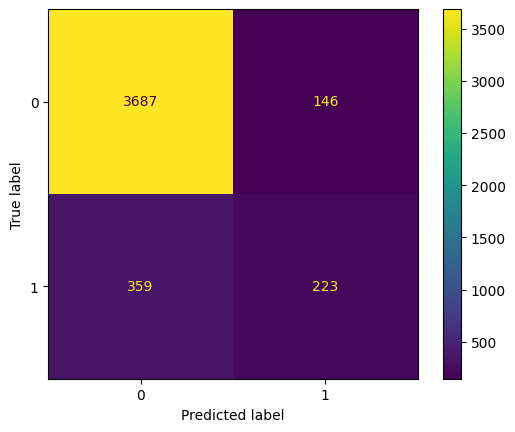

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_x.classes_)
disp.plot()

Plot importance

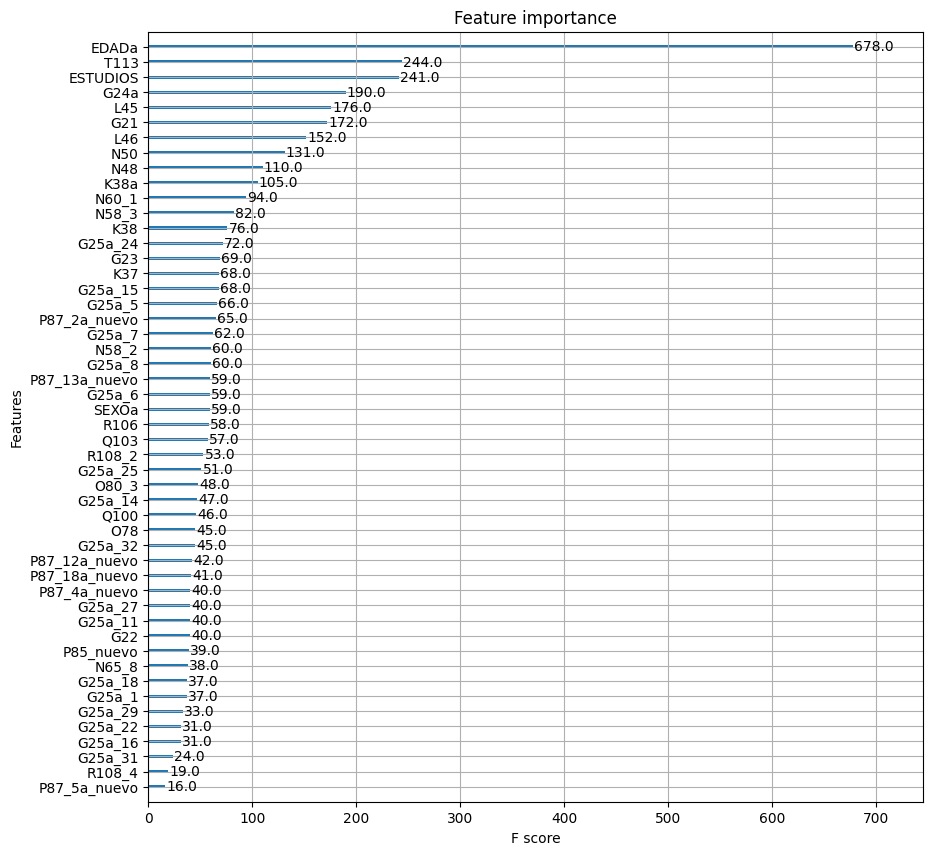

In [19]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Visualizar la importancia de las características

# plt.figure(figsize=(80,80))

fig, ax = plt.subplots(figsize=(10, 10))
plot_importance(model_x, ax=ax)


# plot_importance(model_x, height=10)
plt.show()
# plt.tight_layout()

Plot the tree

In [20]:
# from xgboost import plot_tree
# import matplotlib.pyplot as plt

# # Visualizar el primer árbol del modelo
# fig, ax = plt.subplots(figsize=(80, 80))
# plot_tree(model_x, num_trees=0, rankdir='LR',ax=ax)  # num_trees indica qué árbol visualizar
# plt.show()

In [21]:
## Modificar tamaño grafico PENDIENTE


# Visualizar los primeros cinco árboles del modelo
# for i in range(5):
#     plt.figure(figsize=(80, 80))
#     plot_tree(model_x, num_trees=i, rankdir='LR')
#     plt.title(f'Árbol {i+1}')
#     plt.show()

Gradient a comprobar 

In [22]:

from sklearn.ensemble import GradientBoostingClassifier

## Gardient Boost Classifier
# Create a Gradient Boosting classifier with specified parameters
model = GradientBoostingClassifier(n_estimators=10, random_state=24)

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the training set and calculate the accuracy
y_pred_train = model.predict(X_train)
train_score = accuracy_score(y_train, y_pred_train)
print(f'The accuracy score for Train is {train_score}.')

# Make predictions on the testing set and calculate the accuracy
y_pred_test = model.predict(X_test)
test_score = accuracy_score(y_test, y_pred_test)
print(f'The accuracy score for Test is {test_score}.')

# Calculate and print the difference in accuracy between the training and testing sets
difference = train_score - test_score
print(f'The accuracy difference between the models is {difference}.')

/home/tr4shhh/venv/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy score for Train is 0.8840686413320497.
The accuracy score for Test is 0.8838052095130238.
The accuracy difference between the models is 0.0002634318190258833.


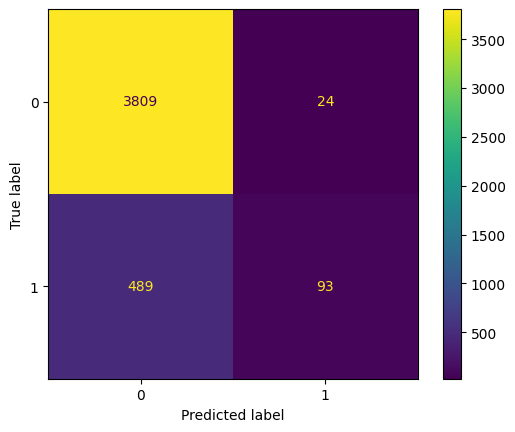

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

# Hyperparameter optimisation

## Part 1 - SelectKbest optimisation:

deleting correlated vars

In [24]:
clean_df=pd.read_csv('../data/interim/final_3dot1.csv')

lista_a_eliminar = ['P87_14a_nuevo', 'P87_7a_nuevo', 'SEVERIDAD_DEPRESIVA', 'CUADROS_DEPRESIVOS', "dep_anx", 'L46','G22', 'G23', 'P85_nuevo']

# We divide the dataset into training and test samples.
X = clean_df.drop(lista_a_eliminar, axis = 1)
y = clean_df["dep_anx"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)


In [25]:
# Ignore specific data conversion warnings
warnings.filterwarnings("ignore", category=DataConversionWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Initialize empty list to store accuracy values
accs = []

# Define a list of percentages for feature selection
percents = np.linspace(0.01,1,50)

# Loop through each percentage
for p in percents:
    # Create a SelectKBest model using ANOVA F-statistic for feature selection
    selection_model = SelectKBest(f_classif, k=int(len(X_train.columns) * p))
    
    # Fit the selection model to the training data
    selection_model.fit(X_train, y_train)

    # Get the indices of selected features
    ix = selection_model.get_support()

    # Transform the training set to include only selected features
    train_sel = pd.DataFrame(selection_model.transform(X_train), columns=X_train.columns.values[ix])

    # Save the selection model
    dump(selection_model, open(f"../models/selectkbest/selection_model{round(p,2)}.pk", "wb"))

    # Define a decision tree classifier
    model = XGBClassifier(random_state=42)

    # Train the decision tree model on the selected features
    model.fit(train_sel, y_train)

    # Make predictions on the training set
    y_pred = model.predict(train_sel)

    # Calculate and store accuracy
    acc = accuracy_score(y_train, y_pred)
    accs.append(acc)
    print(f'for accuracy: {acc} , number of variables selected: {int(len(X_train.columns) * p)} and {round(p,2)}')

# Find the index of the maximum accuracy
best_acc = accs.index(max(accs))

# Print the results
print(f'The best k for selection is {percents[best_acc]}.')
print(f'The best accuracy we get is {round(accs[best_acc], 4)}.')

/home/tr4shhh/venv/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [8 9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


for accuracy: 0.8682109078552416 , number of variables selected: 1 and 0.01


/home/tr4shhh/venv/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [8 9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


for accuracy: 0.8893356742368466 , number of variables selected: 5 and 0.03


/home/tr4shhh/venv/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [8 9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


for accuracy: 0.9025315738800476 , number of variables selected: 9 and 0.05


/home/tr4shhh/venv/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [8 9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


for accuracy: 0.9098374582318627 , number of variables selected: 12 and 0.07


/home/tr4shhh/venv/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [8 9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


for accuracy: 0.9245624964603274 , number of variables selected: 16 and 0.09


/home/tr4shhh/venv/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [8 9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


for accuracy: 0.9298295293651243 , number of variables selected: 20 and 0.11


/home/tr4shhh/venv/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [8 9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


for accuracy: 0.9340771365464122 , number of variables selected: 23 and 0.13


/home/tr4shhh/venv/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [8 9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


for accuracy: 0.9418360989975647 , number of variables selected: 27 and 0.15


/home/tr4shhh/venv/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [8 9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


for accuracy: 0.9393441694512091 , number of variables selected: 31 and 0.17


/home/tr4shhh/venv/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [8 9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


for accuracy: 0.9424024466217364 , number of variables selected: 34 and 0.19


/home/tr4shhh/venv/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [8 9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


for accuracy: 0.9478393838137849 , number of variables selected: 38 and 0.21


/home/tr4shhh/venv/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [8 9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


for accuracy: 0.9533329557682505 , number of variables selected: 42 and 0.23


/home/tr4shhh/venv/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [8 9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


for accuracy: 0.9537293991051707 , number of variables selected: 45 and 0.25


/home/tr4shhh/venv/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [8 9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


for accuracy: 0.9545222857790111 , number of variables selected: 49 and 0.27


/home/tr4shhh/venv/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [8 9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


for accuracy: 0.9565045024636122 , number of variables selected: 53 and 0.29


/home/tr4shhh/venv/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [8 9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


for accuracy: 0.9609786486945687 , number of variables selected: 56 and 0.31


/home/tr4shhh/venv/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [8 9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


for accuracy: 0.9614317267939061 , number of variables selected: 60 and 0.33


/home/tr4shhh/venv/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [8 9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


for accuracy: 0.9630175001415869 , number of variables selected: 64 and 0.35


/home/tr4shhh/venv/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [8 9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


for accuracy: 0.9632440391912556 , number of variables selected: 68 and 0.37


/home/tr4shhh/venv/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [8 9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


for accuracy: 0.9636404825281758 , number of variables selected: 71 and 0.39


/home/tr4shhh/venv/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [8 9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


for accuracy: 0.9626210568046667 , number of variables selected: 75 and 0.41


/home/tr4shhh/venv/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [8 9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


for accuracy: 0.9638103868154273 , number of variables selected: 79 and 0.43


/home/tr4shhh/venv/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [8 9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


for accuracy: 0.9653395254006909 , number of variables selected: 82 and 0.45


/home/tr4shhh/venv/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [8 9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


for accuracy: 0.9648864473013535 , number of variables selected: 86 and 0.47


/home/tr4shhh/venv/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [8 9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


for accuracy: 0.9673783768477091 , number of variables selected: 90 and 0.49


/home/tr4shhh/venv/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [8 9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


for accuracy: 0.9663589511242 , number of variables selected: 93 and 0.52


/home/tr4shhh/venv/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [8 9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


for accuracy: 0.9675482811349606 , number of variables selected: 97 and 0.54


/home/tr4shhh/venv/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [8 9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


for accuracy: 0.9660757773121141 , number of variables selected: 101 and 0.56


/home/tr4shhh/venv/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [8 9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


for accuracy: 0.9662456815993656 , number of variables selected: 104 and 0.58


/home/tr4shhh/venv/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [8 9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


for accuracy: 0.9679447244718808 , number of variables selected: 108 and 0.6


/home/tr4shhh/venv/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [8 9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


for accuracy: 0.9675482811349606 , number of variables selected: 112 and 0.62


/home/tr4shhh/venv/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [8 9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


for accuracy: 0.9682845330463838 , number of variables selected: 115 and 0.64


/home/tr4shhh/venv/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [8 9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


for accuracy: 0.9698703063940647 , number of variables selected: 119 and 0.66


/home/tr4shhh/venv/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [8 9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


for accuracy: 0.9720224273659172 , number of variables selected: 123 and 0.68


/home/tr4shhh/venv/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [8 9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


for accuracy: 0.973608200713598 , number of variables selected: 126 and 0.7


/home/tr4shhh/venv/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [8 9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


for accuracy: 0.9717958883162485 , number of variables selected: 130 and 0.72


/home/tr4shhh/venv/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [8 9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


for accuracy: 0.9734382964263465 , number of variables selected: 134 and 0.74


/home/tr4shhh/venv/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [8 9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


for accuracy: 0.9740046440505182 , number of variables selected: 137 and 0.76


/home/tr4shhh/venv/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [8 9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


for accuracy: 0.9753638783485303 , number of variables selected: 141 and 0.78


/home/tr4shhh/venv/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [8 9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


for accuracy: 0.975590417398199 , number of variables selected: 145 and 0.8


/home/tr4shhh/venv/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [8 9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


for accuracy: 0.973608200713598 , number of variables selected: 148 and 0.82


/home/tr4shhh/venv/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [8 9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


for accuracy: 0.9738913745256839 , number of variables selected: 152 and 0.84


/home/tr4shhh/venv/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [8 9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


for accuracy: 0.974910800249193 , number of variables selected: 156 and 0.86


/home/tr4shhh/venv/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [8 9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


for accuracy: 0.9747408959619415 , number of variables selected: 159 and 0.88


/home/tr4shhh/venv/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [8 9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


for accuracy: 0.9743444526250212 , number of variables selected: 163 and 0.9


/home/tr4shhh/venv/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [8 9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


for accuracy: 0.9728719488021748 , number of variables selected: 167 and 0.92


/home/tr4shhh/venv/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [8 9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


for accuracy: 0.9741745483377697 , number of variables selected: 170 and 0.94


/home/tr4shhh/venv/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [8 9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


for accuracy: 0.9762700345472051 , number of variables selected: 174 and 0.96


/home/tr4shhh/venv/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [8 9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


for accuracy: 0.9768930169337939 , number of variables selected: 178 and 0.98


/home/tr4shhh/venv/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [8 9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


for accuracy: 0.9789318683808121 , number of variables selected: 182 and 1.0
The best k for selection is 1.0.
The best accuracy we get is 0.9789.


**NOTE: try to convert this print into a graph**

Applying optimised selectkbest

In [26]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17657 entries, 10053 to 17520
Columns: 182 entries, CCAA to P87_23a_nuevo
dtypes: float64(58), int64(124)
memory usage: 24.7 MB


In [27]:
import pandas as pd

# Load the pre-trained feature selection model
selection_model = pickle.load(open("../models/selectkbest/selection_model0.11.pk", "rb"))
ix = selection_model.get_support()

# Transform the training and training set to include only selected features
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=X_test.columns.values[ix])

# Initialize a decision tree classifier and fit it
model = XGBClassifier(random_state=42)
model.fit(X_train_sel, y_train)

# Make predictions on the training set and calculate the accuracy
y_pred = model.predict(X_train_sel)
train_score = accuracy_score(y_train, y_pred)
print(f'The accuracy score for Train is {train_score}.')

# Make predictions on the testing set and calculate the accuracy
y_pred = model.predict(X_test_sel)
test_score = accuracy_score(y_test, y_pred)
print(f'The accuracy score for Test is {test_score}.')

# Calculate and print the difference in accuracy between the training and testing sets
difference = train_score - test_score
print(f'The accuracy difference between the models is {difference}.')

The accuracy score for Train is 0.9298295293651243.
The accuracy score for Test is 0.8840317100792752.
The accuracy difference between the models is 0.04579781928584914.


In [28]:
X_train_sel.to_csv('../data/processed/X_train_sel.csv', index=False)

In [91]:
import json

def cambiar_nombres_desde_json(dataframe, ruta_json):
    # Compruebo que puedo cargar el JSON
    with open(ruta_json, 'r') as file:
        nombres_nuevos = json.load(file)

    df_con_nombres = dataframe.copy()  # Crear una copia del DataFrame para evitar modificar el original
    
    for columna in dataframe.columns:
        nuevo_nombre = nombres_nuevos.get(columna, {}).get('Descripción', columna)
        df_con_nombres.rename(columns={columna:f'{columna};{nuevo_nombre}' }, inplace=True)

    return df_con_nombres

cambiar_nombres_desde_json(X_train_sel, '../data/json_files/var_dict.json').columns

Index(['G21;Estado de salud percibido en los últimos 12 meses',
       'G24a;Estado de salud bucodental',
       'G25a_5;Ha padecido alguna vez: Varices en las piernas',
       'G25a_6;Ha padecido alguna vez: Artrosis (excluyendo artritis)',
       'G25a_7;Ha padecido alguna vez: Dolor de espalda crónico (cervical)',
       'G25a_8;Ha padecido alguna vez: Dolor de espalda crónico (lumbar)',
       'G25a_14;Ha padecido alguna vez: Incontinencia urinaria o problemas de control de la orina',
       'G25a_18;Ha padecido alguna vez: Estreñimiento crónico',
       'G25a_24;Ha padecido alguna vez: Migraña o dolor de cabeza frecuente',
       'G25a_25;Ha padecido alguna vez: Hemorroides',
       'G25a_27;Ha padecido alguna vez: Osteoporosis',
       'K37;Dificultad para caminar 500 metros sin ayuda',
       'K38;Dificultad para subir o bajar 12 escalones',
       'K38a;Dificultad para concentrarse',
       'L45;Grado de dolor padecido durante las últimas 4 semanas',
       'N48;Tiempo desde la

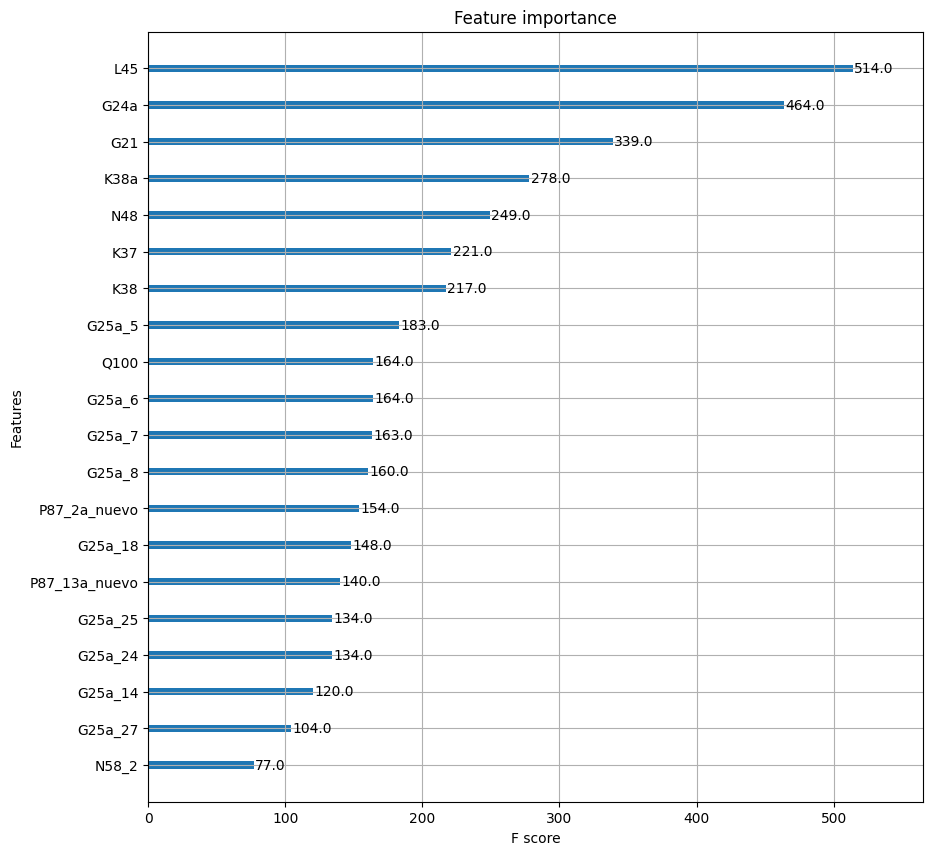

In [92]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Visualizar la importancia de las características

# plt.figure(figsize=(80,80))

fig, ax = plt.subplots(figsize=(10, 10))
plot_importance(model, ax=ax)


# plot_importance(model_x, height=10)
plt.show()
# plt.tight_layout()

## Part 2 - XGB classifier optimisation

grid param optimised with chat gpt

In [111]:
from scipy.stats import randint
grid_param = {
    'n_estimators': randint(50, 200),
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': randint(3, 10),
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'min_child_weight': [1, 2, 3, 4]
}

In [112]:
rand_search=RandomizedSearchCV(model, grid_param, scoring='accuracy', refit=True,n_iter = 100, cv = 5, random_state = 42, verbose=2)

In [113]:
rand_search.fit(X_train_sel,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, min_child_weight=3, n_estimators=156, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, min_child_weight=3, n_estimators=156, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, min_child_weight=3, n_estimators=156, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, min_child_weight=3, n_estimators=156, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, min_child_weight=3, n_estimators=156, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=124, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=124, subsample=1.0; total tim

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2,
                                                          0.3],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f4f57c5c990>,
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f4f57415f90>,
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42, scoring='accuracy', verbose=2)

In [114]:
best_params=rand_search.best_params_
print(best_params)

{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 66, 'subsample': 0.8}


**Training optimised boosting model:**

In [115]:
model_opt=XGBClassifier(**best_params, random_state=42)

In [119]:
model_opt.fit(X_train_sel, y_train)

#pickle
dump(model_opt, open(f'../models/boost{best_params}.pk', 'wb'))

In [120]:
y_pred_train=model_opt.predict(X_train_sel)
y_pred=model_opt.predict(X_test_sel)
boost_acc_opt= accuracy_score(y_pred,y_test)
print('Accuracy train: ', accuracy_score(y_pred_train,y_train))
print('Accuracy test: ', boost_acc_opt)



Accuracy train:  0.892110777595288
Accuracy test:  0.891506228765572
